In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
tf.set_random_seed(777)
np.random.seed(777)

In [3]:
#ydata = xdata*w+b
w = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [4]:
x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

In [5]:
#모델
hf = x*w+b
cost = tf.reduce_mean(tf.square(hf-y))
#예측값-실제값 -> 제곱 -> 합 -> 평균

In [6]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = opt.minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
for step in range(2001):
    _,cv,bv,wv = sess.run([train,cost,b,w],feed_dict={x:[1,2,3],y:[2,3,4]})
    if step %100 ==0:
        print(step, cv, bv, wv)

0 1.3302349 [-0.83235663] [2.168677]
100 0.34429216 [-0.5454619] [1.679854]
200 0.21275164 [-0.2148748] [1.5344255]
300 0.13146769 [0.04499756] [1.4201072]
400 0.081239015 [0.24928111] [1.3302424]
500 0.050200745 [0.4098666] [1.2596006]
600 0.031021029 [0.5361014] [1.2040699]
700 0.019169085 [0.63533366] [1.1604173]
800 0.011845314 [0.7133389] [1.1261027]
900 0.00731967 [0.7746586] [1.0991279]
1000 0.004523099 [0.82286125] [1.0779237]
1100 0.0027950013 [0.8607528] [1.0612555]
1200 0.0017271442 [0.8905388] [1.0481522]
1300 0.0010672751 [0.9139535] [1.0378519]
1400 0.0006595154 [0.9323596] [1.0297551]
1500 0.00040754033 [0.94682854] [1.0233903]
1600 0.00025183623 [0.9582021] [1.018387]
1700 0.00015561536 [0.96714354] [1.0144535]
1800 9.616031e-05 [0.9741718] [1.0113618]
1900 5.9420563e-05 [0.97969687] [1.0089314]
2000 3.6718488e-05 [0.98404] [1.0070208]


In [9]:
#test
print(sess.run(hf,feed_dict={x:[10]}))
print(sess.run(hf,feed_dict={x:[10,10.5]}))

[11.054249]
[11.054249 11.557759]


In [10]:
w = tf.Variable([100.], tf.float32)
b = tf.Variable([-10.], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [11]:
hf = w*x+b
cost = tf.reduce_mean(tf.square(hf-y))

In [12]:
opt = tf.train.GradientDescentOptimizer(0.01)
train = opt.minimize(cost)

In [13]:
xtrain = [1,2,3,4,5]
ytrain = [0,-1,-2,-3,-4]

In [14]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
for i in range(1000):
    sess.run(train, {x:xtrain, y:ytrain})

In [16]:
wv,bv,costv = sess.run([w,b,cost], {x:xtrain, y:ytrain})
print("weight:%s bias:%s cost:%s" %(wv,bv,costv))

weight:[-0.66090524] bias:[-0.2242396] cost:0.27280098


### 연습문제

In [18]:
x = [1,3,5]
y = [10,28,40]

In [19]:
#b는 무시
w = tf.placeholder(tf.float32)
hf = x*w
loss = tf.reduce_mean(tf.square(hf-y))

### 선형회귀모델 작성
#### 시각화 -> weight값을 -3부터 5까지 0.1씩 증가시켜 가면서 cost값의 변화를 출력

In [20]:
import matplotlib.pyplot as plt

In [21]:
wHistory = []
cHistory = []

In [22]:
for i in range(-30,50):
    currW = i*0.1
    lossv = sess.run(loss, feed_dict={w:currW})
    wHistory.append(currW)
    cHistory.append(lossv)

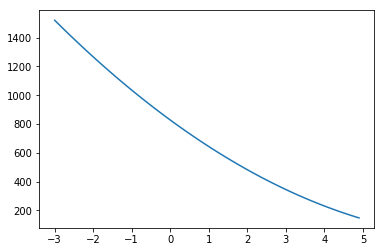

In [23]:
plt.plot(wHistory, cHistory)
plt.show()

#### 경사하강법에서 update 구문 작성

In [24]:
xdata = [1,2,3]
ydata = [1,2,3]

In [25]:
w = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [26]:
hf = x*w

In [27]:
lr = 0.1
cost = tf.reduce_mean(tf.square(hf-y))
gradient = tf.reduce_mean((w*x-y)*x)
descent = w-lr*gradient
update = w.assign(descent)

In [28]:
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update,feed_dict={x:xdata,y:ydata})
    print(step, sess.run(cost,feed_dict={x:xdata,y:ydata}),sess.run(w))

0 0.18648033 [0.80009985]
1 0.053043276 [0.8933866]
2 0.015087888 [0.9431395]
3 0.004291657 [0.9696744]
4 0.0012207427 [0.98382634]
5 0.00034722965 [0.9913741]
6 9.8769204e-05 [0.9953995]
7 2.8094917e-05 [0.9975464]
8 7.991446e-06 [0.9986914]
9 2.2731208e-06 [0.9993021]
10 6.466387e-07 [0.99962777]
11 1.8393331e-07 [0.99980146]
12 5.236566e-08 [0.9998941]
13 1.4899911e-08 [0.9999435]
14 4.252101e-09 [0.99996984]
15 1.204801e-09 [0.9999839]
16 3.43789e-10 [0.9999914]
17 9.884715e-11 [0.9999954]
18 2.8162361e-11 [0.99999756]
19 7.716494e-12 [0.9999987]
20 2.3874236e-12 [0.9999993]


### multi variable linear regression

In [30]:
x1data = [73,93,90,95,72] #5명 모의고사 점수
x2data = [80,88,92,98,66]
x3data = [75,92,90,100,70]
ydata = [152,185,180,195,140]

In [31]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [32]:
w1 = tf.Variable(tf.random_normal([1]))
w2 = tf.Variable(tf.random_normal([1]))
w3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))
hf = x1*w1+x2*w2+x3*w3+b

In [33]:
cost = tf.reduce_mean(tf.square(hf-y))

In [34]:
opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [35]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [36]:
for step in range(2001):
    cv, hfv, _ = sess.run([cost, hf, train], feed_dict={x1:x1data, x2:x2data, x3:x3data, y:ydata})
    if step%10==0:
        print(step, "cost:",cv,'prediction:',hfv)

0 cost: 16677.775 prediction: [269.52734 317.7601  319.14764 344.51285 241.16719]
10 cost: 10.25546 prediction: [155.22217 180.91869 182.79779 197.62122 136.9114 ]
20 cost: 10.054445 prediction: [154.86195 180.50804 182.37769 197.16849 136.60176]
30 cost: 10.00964 prediction: [154.85039 180.51482 182.37347 197.16383 136.61015]
40 cost: 9.9651 prediction: [154.83992 180.52286 182.37056 197.16057 136.61948]
50 cost: 9.920748 prediction: [154.82948 180.53088 182.36766 197.1573  136.6288 ]
60 cost: 9.876642 prediction: [154.81906 180.53888 182.36476 197.15404 136.63808]
70 cost: 9.8327465 prediction: [154.80867 180.54686 182.36185 197.15079 136.64732]
80 cost: 9.78908 prediction: [154.79831 180.55482 182.35898 197.14755 136.65657]
90 cost: 9.745652 prediction: [154.78798 180.56277 182.35612 197.14433 136.66579]
100 cost: 9.702414 prediction: [154.77768 180.5707  182.35324 197.14111 136.67499]
110 cost: 9.659393 prediction: [154.76738 180.57858 182.35037 197.1379  136.68416]
120 cost: 9.616

1320 cost: 5.7718267 prediction: [153.6976  181.40169 182.05391 196.80022 137.6399 ]
1330 cost: 5.7485437 prediction: [153.69008 181.40752 182.05183 196.79784 137.64667]
1340 cost: 5.725385 prediction: [153.68256 181.41333 182.04977 196.79544 137.6534 ]
1350 cost: 5.70234 prediction: [153.67503 181.41908 182.04768 196.79301 137.66011]
1360 cost: 5.6794333 prediction: [153.66756 181.42485 182.04562 196.79063 137.66681]
1370 cost: 5.656588 prediction: [153.66008 181.43062 182.04356 196.78824 137.6735 ]
1380 cost: 5.633896 prediction: [153.65263 181.43634 182.0415  196.78586 137.68018]
1390 cost: 5.6113486 prediction: [153.64522 181.44206 182.03947 196.78348 137.68681]
1400 cost: 5.5888696 prediction: [153.6378  181.44778 182.03741 196.78113 137.69344]
1410 cost: 5.566512 prediction: [153.63042 181.45348 182.03539 196.77875 137.70006]
1420 cost: 5.5442567 prediction: [153.62305 181.45917 182.03336 196.7764  137.70667]
1430 cost: 5.522106 prediction: [153.61568 181.46483 182.03131 196.7740

#### 행렬곱셈 형태로 변환

In [38]:
xdata = [[73,93,90,95,72] #5명 모의고사 점수
         ,[80,88,92,98,66]
        ,[75,92,90,100,70]]
ydata = [[152],[185],[180],[195],[140]]

In [39]:
xdata = np.array(xdata).T
ydata

[[152], [185], [180], [195], [140]]

In [40]:
xdata.shape #(5, 3)
np.shape(ydata) #(5, 1)

(5, 1)

In [41]:
x = tf.placeholder(tf.float32, shape=[None,3])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([3,1]))
b = tf.Variable(tf.random_normal([1]))

In [42]:
hf = tf.matmul(x,w) + b  #(5,3) * (3,1) + 1

In [43]:
cost = tf.reduce_mean(tf.square(hf-y))

In [44]:
opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv, hfv, _ = sess.run([cost,hf,train],feed_dict={x:xdata, y:ydata})
    if step%10==0:
        print(cv,hfv)

83514.58 [[-103.36177 ]
 [-126.06217 ]
 [-124.756035]
 [-131.37592 ]
 [ -97.0782  ]]
8.457786 [[152.45941]
 [180.25848]
 [180.43144]
 [197.40564]
 [136.30911]]
7.6486535 [[153.23433]
 [181.20197]
 [181.3633 ]
 [198.40854]
 [137.0305 ]]
7.621402 [[153.2289 ]
 [181.21107]
 [181.36421]
 [198.40855]
 [137.04001]]
7.5942945 [[153.22108]
 [181.21729]
 [181.36229]
 [198.40547]
 [137.0473 ]]
7.5673103 [[153.2133 ]
 [181.22348]
 [181.36037]
 [198.40239]
 [137.05458]]
7.54046 [[153.20552]
 [181.22966]
 [181.35843]
 [198.3993 ]
 [137.06181]]
7.5137825 [[153.19778]
 [181.23582]
 [181.35652]
 [198.39627]
 [137.06906]]
7.4872236 [[153.19003]
 [181.24194]
 [181.35458]
 [198.39319]
 [137.07625]]
7.4607363 [[153.18233]
 [181.2481 ]
 [181.35269]
 [198.39014]
 [137.08347]]
7.434442 [[153.17462]
 [181.25418]
 [181.35077]
 [198.38708]
 [137.09064]]
7.4082856 [[153.16696]
 [181.26028]
 [181.34888]
 [198.38406]
 [137.0978 ]]
7.382182 [[153.1593 ]
 [181.26639]
 [181.347  ]
 [198.38103]
 [137.10495]]
7.3562455

5.092684 [[152.40012]
 [181.87367]
 [181.16354]
 [198.06921]
 [137.81929]]
5.07783 [[152.39447]
 [181.87822]
 [181.16222]
 [198.06679]
 [137.82466]]
5.0630465 [[152.38884]
 [181.88277]
 [181.16089]
 [198.06438]
 [137.83002]]
5.0483522 [[152.38322]
 [181.8873 ]
 [181.15959]
 [198.06198]
 [137.83537]]
5.033716 [[152.3776 ]
 [181.8918 ]
 [181.15825]
 [198.05957]
 [137.8407 ]]
5.0191545 [[152.37201]
 [181.8963 ]
 [181.15692]
 [198.05716]
 [137.846  ]]
5.0046782 [[152.36646]
 [181.9008 ]
 [181.15564]
 [198.05478]
 [137.8513 ]]
4.9902487 [[152.3609 ]
 [181.9053 ]
 [181.15436]
 [198.0524 ]
 [137.8566 ]]
4.975868 [[152.35532]
 [181.90974]
 [181.15302]
 [198.04997]
 [137.86186]]
4.9615803 [[152.34978]
 [181.91422]
 [181.15172]
 [198.04759]
 [137.86711]]
4.9473505 [[152.34428]
 [181.91869]
 [181.15044]
 [198.04524]
 [137.87239]]
4.933193 [[152.33878]
 [181.92313]
 [181.14915]
 [198.04286]
 [137.87762]]
4.9191256 [[152.33327]
 [181.92752]
 [181.14786]
 [198.04047]
 [137.88283]]
4.9051228 [[152.32

In [ ]:
# 90, 90, 90 => 예상되는 점수?

In [65]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [68]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

0 Cost: 89152.57 
Prediction:
 [[-124.40498 ]
 [-154.90985 ]
 [-149.93309 ]
 [-162.86958 ]
 [-119.74163 ]
 [ -88.09014 ]
 [-119.64422 ]
 [ -85.40542 ]
 [-145.42119 ]
 [-134.13226 ]
 [-117.305756]
 [-117.825966]
 [-155.48088 ]
 [-130.19708 ]
 [-120.93788 ]
 [-156.27698 ]
 [-126.17824 ]
 [-142.14732 ]
 [-147.46568 ]
 [-131.24641 ]
 [-141.29588 ]
 [-144.51427 ]
 [-134.37645 ]
 [-126.70736 ]
 [-159.94649 ]]
10 Cost: 17.750639 
Prediction:
 [[154.36354]
 [180.16745]
 [180.2117 ]
 [196.68727]
 [135.81181]
 [100.32804]
 [149.49625]
 [114.1177 ]
 [167.74283]
 [155.94498]
 [141.9999 ]
 [137.86671]
 [185.60056]
 [153.33716]
 [149.44365]
 [183.74945]
 [143.85312]
 [180.84473]
 [177.70245]
 [159.6998 ]
 [174.31589]
 [169.83572]
 [166.53137]
 [154.34894]
 [187.31682]]
20 Cost: 13.435838 
Prediction:
 [[156.27658 ]
 [182.48947 ]
 [182.48755 ]
 [199.17023 ]
 [137.58475 ]
 [101.64457 ]
 [151.355   ]
 [115.495186]
 [169.92354 ]
 [157.9766  ]
 [143.79295 ]
 [139.64642 ]
 [187.94772 ]
 [155.28358 ]
 [151

340 Cost: 11.757807 
Prediction:
 [[155.89977]
 [182.71767]
 [182.35078]
 [199.15144]
 [137.82057]
 [102.09855]
 [151.34306]
 [115.46929]
 [170.45364]
 [158.81592]
 [143.85088]
 [140.05388]
 [187.68555]
 [154.9257 ]
 [151.41893]
 [186.40038]
 [145.4212 ]
 [182.98296]
 [179.56044]
 [161.31041]
 [176.53487]
 [172.31422]
 [168.54903]
 [155.60292]
 [189.78621]]
350 Cost: 11.712358 
Prediction:
 [[155.8884 ]
 [182.72392]
 [182.34639]
 [199.15038]
 [137.8272 ]
 [102.11152]
 [151.34227]
 [115.46806]
 [170.46869]
 [158.83992]
 [143.85219]
 [140.06538]
 [187.6775 ]
 [154.915  ]
 [151.42151]
 [186.40843]
 [145.41264]
 [182.97974]
 [179.5491 ]
 [161.29878]
 [176.53545]
 [172.32245]
 [168.5468 ]
 [155.58322]
 [189.7878 ]]
360 Cost: 11.667273 
Prediction:
 [[155.87704]
 [182.73013]
 [182.34196]
 [199.1493 ]
 [137.83379]
 [102.12445]
 [151.34143]
 [115.46685]
 [170.48364]
 [158.8638 ]
 [143.85349]
 [140.07684]
 [187.6695 ]
 [154.90433]
 [151.42407]
 [186.41647]
 [145.40411]
 [182.9765 ]
 [179.53781]

700 Cost: 10.340463 
Prediction:
 [[155.51784 ]
 [182.92824 ]
 [182.20306 ]
 [199.11482 ]
 [138.04492 ]
 [102.533646]
 [151.3123  ]
 [115.42207 ]
 [170.95746 ]
 [159.61693 ]
 [143.89326 ]
 [140.4387  ]
 [187.41782 ]
 [154.57076 ]
 [151.5018  ]
 [186.67052 ]
 [145.14021 ]
 [182.8694  ]
 [179.18233 ]
 [160.92207 ]
 [176.55083 ]
 [172.59    ]
 [168.47209 ]
 [154.94608 ]
 [189.84102 ]]
710 Cost: 10.3068905 
Prediction:
 [[155.508  ]
 [182.93369]
 [182.19928]
 [199.11386]
 [138.05077]
 [102.54483]
 [151.31142]
 [115.42066]
 [170.9704 ]
 [159.63745]
 [143.89432]
 [140.44858]
 [187.41098]
 [154.56175]
 [151.50381]
 [186.67744]
 [145.13316]
 [182.8663 ]
 [179.17265]
 [160.91211]
 [176.55115]
 [172.59708]
 [168.47002]
 [154.92926]
 [189.84248]]
720 Cost: 10.273596 
Prediction:
 [[155.49821 ]
 [182.93915 ]
 [182.19553 ]
 [199.11292 ]
 [138.05661 ]
 [102.55598 ]
 [151.31055 ]
 [115.419266]
 [170.98334 ]
 [159.65787 ]
 [143.89539 ]
 [140.45842 ]
 [187.4042  ]
 [154.5528  ]
 [151.50586 ]
 [186.6843

1070 Cost: 9.2679615 
Prediction:
 [[155.17957 ]
 [183.11768 ]
 [182.07387 ]
 [199.08115 ]
 [138.2491  ]
 [102.918594]
 [151.27869 ]
 [115.36786 ]
 [171.40332 ]
 [160.31949 ]
 [143.92868 ]
 [140.77753 ]
 [187.18562 ]
 [154.2651  ]
 [151.56886 ]
 [186.90955 ]
 [144.90427 ]
 [182.75854 ]
 [178.85217 ]
 [160.58148 ]
 [176.55902 ]
 [172.8338  ]
 [168.3989  ]
 [154.3718  ]
 [189.89362 ]]
1080 Cost: 9.243309 
Prediction:
 [[155.1711 ]
 [183.12245]
 [182.07065]
 [199.08028]
 [138.25429]
 [102.92821]
 [151.27776]
 [115.36632]
 [171.41444]
 [160.33696]
 [143.92952]
 [140.78598]
 [187.17987]
 [154.25758]
 [151.57045]
 [186.91551]
 [144.89854]
 [182.75563]
 [178.84398]
 [160.57301]
 [176.55914]
 [172.83989]
 [168.39699]
 [154.35753]
 [189.89497]]
1090 Cost: 9.218886 
Prediction:
 [[155.16269]
 [183.12723]
 [182.06746]
 [199.0794 ]
 [138.25943]
 [102.93779]
 [151.27682]
 [115.36479]
 [171.42554]
 [160.35434]
 [143.93039]
 [140.79437]
 [187.17416]
 [154.25009]
 [151.57202]
 [186.92145]
 [144.89285]

1440 Cost: 8.479892 
Prediction:
 [[154.88844 ]
 [183.28337 ]
 [181.96417 ]
 [199.05095 ]
 [138.42981 ]
 [103.249504]
 [151.24391 ]
 [115.30987 ]
 [171.78668 ]
 [160.91782 ]
 [143.9572  ]
 [141.0673  ]
 [186.99025 ]
 [154.00996 ]
 [151.6208  ]
 [187.11504 ]
 [144.713   ]
 [182.65376 ]
 [178.57234 ]
 [160.29141 ]
 [176.56062 ]
 [173.0432  ]
 [168.33128 ]
 [153.88434 ]
 [189.94257 ]]
1450 Cost: 8.4617815 
Prediction:
 [[154.88116 ]
 [183.28757 ]
 [181.96144 ]
 [199.05017 ]
 [138.43439 ]
 [103.257774]
 [151.24298 ]
 [115.308266]
 [171.79626 ]
 [160.93268 ]
 [143.95789 ]
 [141.07452 ]
 [186.98544 ]
 [154.0037  ]
 [151.62201 ]
 [187.12015 ]
 [144.70837 ]
 [182.65103 ]
 [178.5654  ]
 [160.28421 ]
 [176.56058 ]
 [173.04843 ]
 [168.32953 ]
 [153.87224 ]
 [189.94382 ]]
1460 Cost: 8.443774 
Prediction:
 [[154.87392 ]
 [183.29173 ]
 [181.95874 ]
 [199.04942 ]
 [138.43898 ]
 [103.266014]
 [151.24202 ]
 [115.30666 ]
 [171.80582 ]
 [160.94751 ]
 [143.95857 ]
 [141.08173 ]
 [186.98064 ]
 [153.99745 ]

1820 Cost: 7.885899 
Prediction:
 [[154.63141]
 [183.43216]
 [181.86871]
 [199.02321]
 [138.59401]
 [103.54131]
 [151.20776]
 [115.2481 ]
 [172.12485]
 [161.44019]
 [143.98058]
 [141.32144]
 [186.82196]
 [153.79211]
 [151.66125]
 [187.29625]
 [144.55511]
 [182.55252]
 [178.3293 ]
 [160.03815]
 [176.55695]
 [173.22768]
 [168.26729]
 [153.4603 ]
 [189.98921]]
1830 Cost: 7.872632 
Prediction:
 [[154.62517]
 [183.43582]
 [181.86641]
 [199.02252]
 [138.59807]
 [103.5484 ]
 [151.20682]
 [115.24647]
 [172.13307]
 [161.4528 ]
 [143.98112]
 [141.32759]
 [186.81795]
 [153.78691]
 [151.66216]
 [187.30064]
 [144.55144]
 [182.54994]
 [178.32346]
 [160.03203]
 [176.55681]
 [173.23216]
 [168.26567]
 [153.45007]
 [189.9904 ]]
1840 Cost: 7.8594694 
Prediction:
 [[154.61893 ]
 [183.43945 ]
 [181.86414 ]
 [199.02184 ]
 [138.60211 ]
 [103.555466]
 [151.20587 ]
 [115.24483 ]
 [172.14127 ]
 [161.46538 ]
 [143.98166 ]
 [141.33372 ]
 [186.81393 ]
 [153.78174 ]
 [151.66309 ]
 [187.30504 ]
 [144.54776 ]
 [182.5

In [69]:
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100,100, 100]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[90, 90, 90], [90, 100, 80]]}))

Your score will be  [[201.37233]]
Other scores will be  [[181.27626]
 [178.50983]]


### logistic regression (logistic classification)

In [71]:
xdata = [[1,2],
         [2,3],
         [3,1],
         [4,3],
         [5,3],
         [6,2]]
ydata = [[0],
         [0],
         [0],
         [1],
         [1],
         [1]]

In [72]:
x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

In [73]:
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

In [74]:
hf = tf.sigmoid(tf.matmul(x,w)+b)

In [88]:
hf

<tf.Tensor 'Sigmoid:0' shape=(?, 1) dtype=float32>

In [75]:
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [76]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [85]:
# 0.5 기준(크면->1, 작으면->0)
predicted = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [87]:
#모델
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv = sess.run([train, cost], feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
    print("예측값:", hv, "예측분류:", pv, "정확도:", av*100, "%")

0 1.6267152
200 0.5666325
400 0.5120047
600 0.4795616
800 0.45632723
1000 0.43750957
1200 0.4211267
1400 0.40627852
1600 0.3925235
1800 0.37962842
2000 0.36746034
2200 0.35593677
2400 0.34500095
2600 0.33460996
2800 0.32472873
3000 0.31532675
3200 0.30637652
3400 0.29785207
3600 0.2897295
3800 0.28198627
4000 0.27460083
4200 0.26755306
4400 0.26082382
4600 0.25439513
4800 0.24824996
5000 0.24237227
5200 0.23674726
5400 0.23136054
5600 0.2261991
5800 0.22125037
6000 0.21650273
6200 0.21194528
6400 0.20756775
6600 0.20336057
6800 0.19931464
7000 0.19542158
7200 0.19167341
7400 0.18806274
7600 0.18458255
7800 0.18122639
8000 0.17798807
8200 0.17486165
8400 0.17184182
8600 0.1689235
8800 0.1661018
9000 0.16337223
9200 0.16073056
9400 0.15817271
9600 0.15569487
9800 0.15329354
10000 0.15096526
10200 0.14870691
10400 0.14651538
10600 0.14438793
10800 0.14232181
11000 0.14031442
11200 0.13836338
11400 0.13646644
11600 0.13462141
11800 0.13282616
12000 0.13107876
12200 0.12937741
12400 0.12772

In [ ]:
# 1. 위에 작성한 방식처럼 트리이닝/테스트 데이터 나누지 말고 
# 2. 70(트레이닝):30(테스트)의 비율로 분리
#     70(트레이닝) -> 모델 생성 -> 30(테스트) -> 정확도?

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
xy = np.loadtxt("dataset (1)/ThoraricSurgery.csv", delimiter=",", dtype=np.float32)
xy.shape

(470, 18)

In [3]:
#1
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

print(x_data, "\nx_data shape:", x_data.shape) #(470, 17)
print(y_data, "\ny_data shape:", y_data.shape) #(470, 1)

[[293.     1.     3.8  ...   1.     0.    62.  ]
 [  1.     2.     2.88 ...   1.     0.    60.  ]
 [  8.     2.     3.19 ...   1.     0.    66.  ]
 ...
 [406.     6.     5.36 ...   0.     0.    62.  ]
 [ 25.     8.     4.32 ...   0.     0.    58.  ]
 [447.     8.     5.2  ...   0.     0.    49.  ]] 
x_data shape: (470, 17)
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0

In [4]:
X = tf.placeholder(tf.float32, shape=[None,17])
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([17,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name='bias')

In [5]:
hf = tf.sigmoid(tf.matmul(X,W)+b)

In [6]:
cost = tf.reduce_mean(Y*tf.log(hf)+(1-Y)*tf.log(1-hf))

In [7]:
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [8]:
# hf가 0.5보다 크면->1, 작으면->0
predicted = tf.cast(hf>0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv = sess.run([train,cost], feed_dict={X:x_data, Y:y_data})
        if step%200==0:
            print(step,cv)
    hv,pv,av = sess.run([hf,predicted,accuracy], feed_dict={X:x_data, Y:y_data})
    print("예측값:",hv,"예측 분류:",pv, "정확도:",av*100, "%")

0 nan
200 nan
400 nan
600 nan
800 nan
1000 nan
1200 nan
1400 nan
1600 nan
1800 nan
2000 nan
2200 nan
2400 nan
2600 nan
2800 nan
3000 nan
3200 nan
3400 nan
3600 nan
3800 nan
4000 nan
4200 nan
4400 nan
4600 nan
4800 nan
5000 nan
5200 nan
5400 nan
5600 nan
5800 nan
6000 nan
6200 nan
6400 nan
6600 nan
6800 nan
7000 nan
7200 nan
7400 nan
7600 nan
7800 nan
8000 nan
8200 nan
8400 nan
8600 nan
8800 nan
9000 nan
9200 nan
9400 nan
9600 nan
9800 nan
10000 nan
10200 nan
10400 nan
10600 nan
10800 nan
11000 nan
11200 nan
11400 nan
11600 nan
11800 nan
12000 nan
12200 nan
12400 nan
12600 nan
12800 nan
13000 nan
13200 nan
13400 nan
13600 nan
13800 nan
14000 nan
14200 nan
14400 nan
14600 nan
14800 nan
15000 nan
15200 nan
15400 nan
15600 nan
15800 nan
16000 nan
16200 nan
16400 nan
16600 nan
16800 nan
17000 nan
17200 nan
17400 nan
17600 nan
17800 nan
18000 nan
18200 nan
18400 nan
18600 nan
18800 nan
19000 nan
19200 nan
19400 nan
19600 nan
19800 nan
20000 nan
예측값: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]


In [10]:
#2
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, train_size=0.7, random_state=42)

In [16]:
x_train.shape #(329, 17)
y_train.shape #(329, 1)
x_test.shape #(141, 17)
y_test.shape #(141, 1)

(141, 1)

In [17]:
#train
x = tf.placeholder(tf.float32, shape=[None,17])
y = tf.placeholder(tf.float32, shape=[None,1])
w = tf.Variable(tf.random_normal([17,1]))
b = tf.Variable(tf.random_normal([1]))

In [18]:
hf = tf.sigmoid(tf.matmul(x,w)+b)